In [1]:
%cd '/home/threadripper/PycharmProjects/coh_analysis'

/home/threadripper/PycharmProjects/coh_analysis


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from services.coherence_service import CoherenceService

In [3]:
mpl.rcParams['figure.dpi'] = 200

In [4]:
coherence_service = CoherenceService()
coherence_service.load_from_cache()

In [5]:
coherence_service.data

,length,log_length,c_length,num_edits,log_num_edits,c_num_edits,popularity,c_popularity,c_collaborative,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tonality,artists
657000,80,4.382027,1,16,2.772589,1,8.073578,2,0,-0.204423,0.004966,0.050241,-0.070003,0.215957,-0.031432,-0.110339,0.070400,-0.131460,0.155342,0.029116
657001,28,3.332205,0,22,3.091042,1,7.157755,1,0,0.048512,0.036950,0.096431,-0.269302,0.109809,-0.064993,-0.153084,-0.091908,-0.025809,0.027100,0.067336
657004,27,3.295837,0,4,1.386294,0,8.244777,2,0,0.239329,0.162633,-0.170984,0.178848,0.190761,-0.047002,-0.037788,0.013248,0.071527,-0.131989,0.062189
657005,23,3.135494,0,5,1.609438,1,6.363797,1,0,0.073375,-0.128113,-0.058370,-0.188093,-0.111972,0.033246,0.041553,0.150926,-0.378288,-0.228606,0.204304
657006,43,3.761200,1,4,1.386294,0,8.870327,2,0,-0.157039,0.355360,0.362817,0.112197,0.261058,0.043628,0.104775,-0.125808,0.012618,0.057037,0.195153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956992,15,2.708050,0,2,0.693147,0,8.081339,2,0,-0.058965,0.043485,-0.147843,-0.023632,-0.219811,NaN,-0.119055,-0.095128,0.040446,-0.243872,-0.017093
956993,44,3.784190,1,15,2.708050,1,8.009465,2,0,-0.084521,-0.012339,-0.198269,0.090764,-0.089335,NaN,0.072942,0.104070,0.199087,0.168419,0.017132
956994,17,2.833213,0,4,1.386294,0,5.778014,0,0,-0.074460,-0.054699,-0.009119,-0.169055,0.218348,NaN,0.112013,-0.386230,0.311817,-0.034969,0.419643
956997,22,3.091042,0,9,2.197225,1,8.381551,2,0,0.237690,0.306554,0.025996,-0.059190,0.271303,-0.097251,-0.157598,0.139749,-0.267555,-0.065046,-0.001489


In [6]:
def plot(data: pd.DataFrame, independent_variable, dependent_variable, size=10000):
    f = plt.figure(figsize=(9, 9))
    samples = data[~data[dependent_variable].isna()].sample(size)
    x = samples[independent_variable]
    y = samples[dependent_variable]
    
    ax = sns.jointplot(x=x, y=y, kind="hex")
    print(spearmanr(x, y))
    return ax

SignificanceResult(statistic=np.float64(-0.0911433555884147), pvalue=np.float64(2.01963865183237e-183))


<Figure size 1800x1800 with 0 Axes>

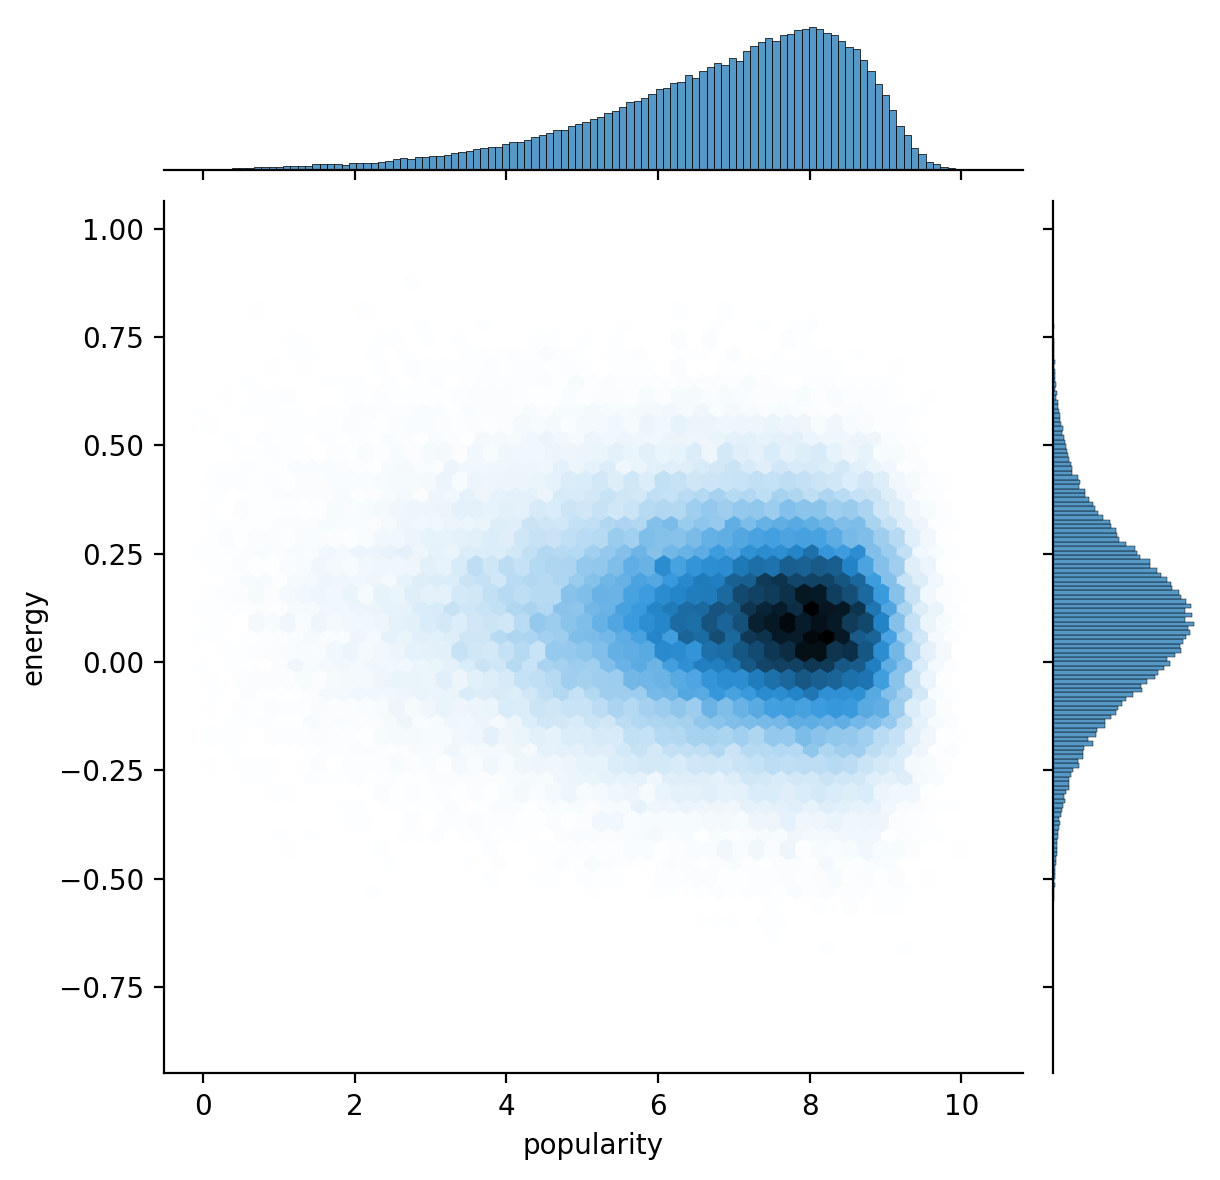

In [7]:
plot(coherence_service.data, 'popularity', 'energy', 100000)